## Ejercicio 1

La *ecuación de Fisher-Kolmogoroff* combina una dinámica logística (tema que veremos próximamente en más detalle) con un transporte difusivo, en forma de una ecuación de reacción-difusión. En 1D tenemos:
$$
\frac{\partial u}{\partial t} = r u (1-u) + D \frac{\partial^2 u}{\partial^2 x},
$$
donde  $u = u(x,t)$.

Esta ecuación admite soluciones en forma de ondas viajeras, lo cual es un poco sorprendente, siendo que no es una ecuación de ondas: la derivada temporal del miembro izquierdo es una derivada primera, no segunda. Además, el rol intuitivo de la difusión es el de borronear las inhomogeneidades, ¡no propagarlas! Sin embargo, la acción conjunta del término logístico y el difusivo produce una especie de milagro matemático, y se propaga una onda a velocidad $c = 2 \sqrt{r D}$, sin cambiar de forma.

Analice la evolución de una condición inicial en forma de escalón suave, tipo:
$$
u (x,0) = \frac{1}{2} \biggl( 1 - erf \Bigl( \frac{x-x_0}{L} \Bigr) \biggr),
$$
usando al menos dos valores del parámetro de escala espacial $L$.

La onda viajará hacia la derecha, así que elija sabiamente el valor de $x_0$, el espacio de integración, y los parámetros $r$ y $D$, para poder verla. Asimismo, defina condiciones de borde compatibles con la condición inicial.

1. Use un método FTCS. Dibuje el perfil de la onda viajera a distintos tiempos. ¿Puede usar cualquier valor de $\Delta x$ y $\Delta t$? Calcule la velocidad del frente de onda (definiéndolo como le parezca mejor) en función del tiempo.

2. ¿Cómo debería ser la condición inicial para que la onda viaje hacia la izquierda?

El método FTCS consta de emplear el esquema hacia adelante en el tiempo
$$
\frac{\partial u}{\partial t}  = \frac{u^{n+1}_i - u^n_i}{\Delta t}
$$
y el centrado en el espacio
 $$
\frac{\partial^2 u(x,t)}{\partial x^2} = \frac{u(x+\Delta x,t)+ u(x-\Delta x,t) -2 u(x,t)}{\Delta x^2} + \mathcal{O}(\Delta x^2).
 $$

de modo que la ecuación
$$
\frac{\partial u}{\partial t} = r u (1-u) + D \frac{\partial^2 u}{\partial^2 x},
$$
queda
$$
\frac{u^{n+1}_i - u^n_i}{\Delta t} = r u^{n}_i (1 - u^n_i) + D \frac{u_{i+1}^n + u^n_{i-1} -2 u^n_i}{\Delta x^2}
$$

despejando $ u_i^{n+1} $ tenemos
$$
u^{n+1}_i = u^n_i + \Delta t \left [ r u^{n}_i (1 - u^n_i) + D \frac{u_{i+1}^n + u^n_{i-1} -2 u^n_i}{\Delta x^2} \right ]
$$

In [2]:
#Import librearies
import numpy as np
import matplotlib.pyplot as plt
# from ipywidgets import interact


In [3]:
def u0(x, x0, L):
    '''
    Condición inicial
    '''
    if type(x) == np.ndarray:
        u0_vec = np.empty(len(x))
        for i in range(len(x)):
            u0_vec[i] = 1/2*(1-erf((x[i]-x0)/L))
        return u0_vec
    else:
        return 1/2*(1-erf((x-x0)/L))



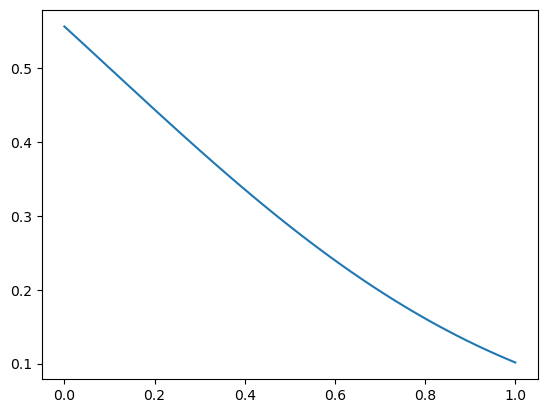

In [4]:
#Initial condicion with particular set of parameters
L = 1
x0 = 0.1
M = 100 #nro de elementos en la discretización

x_vec = np.linspace(0,L,M)
u0_vec = u0(x_vec, x0, L)

#Graph
plt.plot(x_vec, u0_vec)

In [8]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt

def plot_u0(x0=0.1, L=1):
    M = 1000
    x_vec = np.linspace(-10, 10, M)
    u0_vec = u0(x_vec, x0, L)  # Assuming you have defined the u0 function elsewhere

    clear_output(wait=True)  # Clear the previous plot
    plt.plot(x_vec, u0_vec)
    plt.xlabel('x')
    plt.ylabel('u0')
    plt.title('Grafica de u0')
    plt.xlim([-10,10])
    plt.ylim([0,2])

    plt.show()

    # Redisplay the sliders after clearing the output
    # display(widgets.interactive(plot_u0, x0=widgets.FloatSlider(min=-5, max=5, step=0.1, value=5), L=widgets.FloatSlider(min=1, max=4, step=0.1, value=2)))

# Initially display the sliders and the plot
widgets.interact(plot_u0, x0=widgets.FloatSlider(min=-5, max=5, step=0.1, value=5), L=widgets.FloatSlider(min=1, max=4, step=0.1, value=2))


# interact(plot_u0, x0=(0, 5, 0.1), )


interactive(children=(FloatSlider(value=5.0, description='x0', max=5.0, min=-5.0), FloatSlider(value=2.0, desc…

<function __main__.plot_u0(x0=0.1, L=1)>

In [6]:

def FTCS(u_previo, u_actual, u_posterior, dt, dx, D, r):
    '''
    Esquema de evolución

    con
    u_previo = u^n_{j-1}
    u_actual = u^n_{j}
    u_posterior = u^n_{j+1}

    '''

    

def solver_dt(u0_vec, dt, dx, D, r):
    '''
    Avanza la solución en una unidad de tiempo
    '''
    pass

def solver(u0_vec, T, dt, dx, D, r):
    '''
    Avanza la solución hasta tiempo T
    '''

In [7]:
#Resuelvo para un caso particular
D = 1
r = 1
dt = 0.1
dx = 0.1
